<a href="https://colab.research.google.com/github/shraddha-369/P3Covid19DataVsualization_And_Prediction/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.linear_model import LinearRegression


In [5]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filter for India (or your country)
df = df[df['location'] == 'India']
df = df[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']]
df['date'] = pd.to_datetime(df['date'])
df.fillna(0, inplace=True)
df.tail()


,date,total_cases,new_cases,total_deaths,new_deaths
175226,2024-08-08,0.0,0.0,0.0,0.0
175227,2024-08-09,0.0,0.0,0.0,0.0
175228,2024-08-10,0.0,0.0,0.0,0.0
175229,2024-08-11,0.0,0.0,0.0,0.0
175230,2024-08-12,0.0,0.0,0.0,0.0


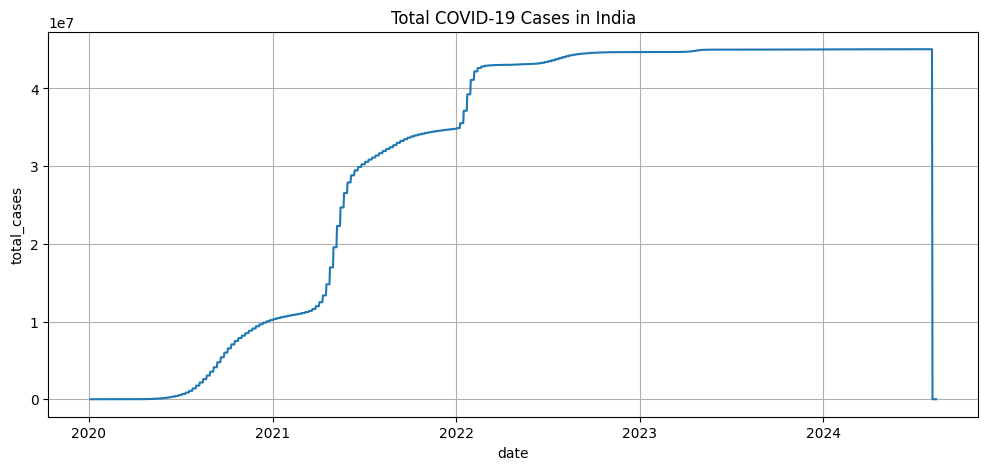

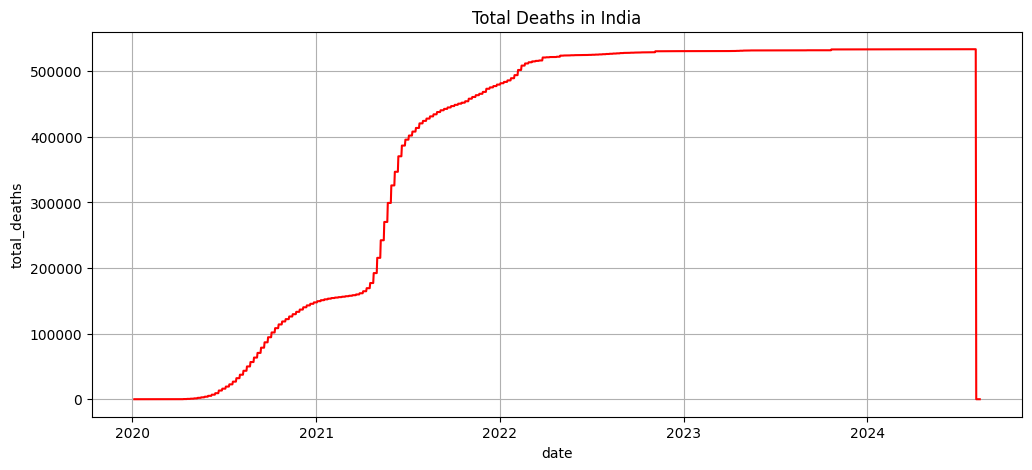

In [6]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='total_cases', data=df)
plt.title('Total COVID-19 Cases in India')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='total_deaths', data=df, color='red')
plt.title('Total Deaths in India')
plt.grid(True)
plt.show()


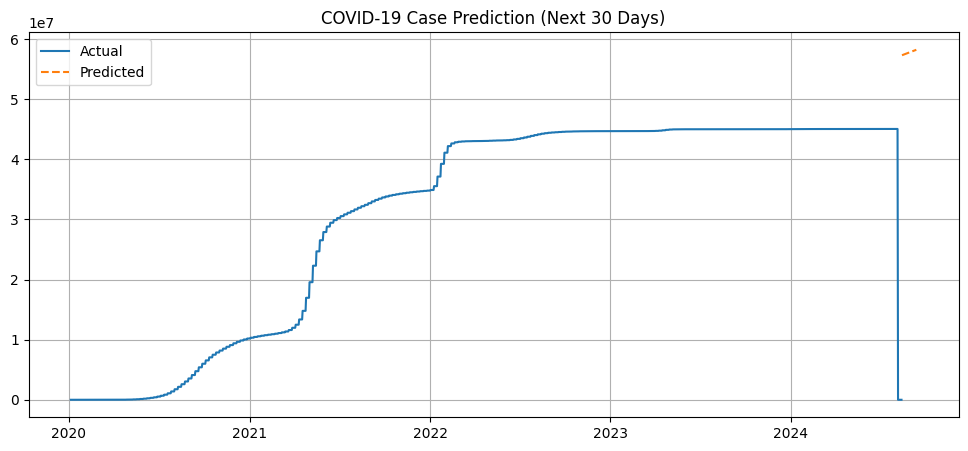

In [7]:
df['days_since'] = (df['date'] - df['date'].min()).dt.days
X = df['days_since'].values.reshape(-1, 1)
y = df['total_cases'].values

model = LinearRegression()
model.fit(X, y)

future_days = 30
future = np.arange(X[-1][0] + 1, X[-1][0] + future_days + 1).reshape(-1, 1)
predictions = model.predict(future)

plt.figure(figsize=(12, 5))
plt.plot(df['date'], y, label='Actual')
plt.plot(pd.date_range(df['date'].max(), periods=future_days + 1, freq='D')[1:], predictions, linestyle='--', label='Predicted')
plt.title("COVID-19 Case Prediction (Next 30 Days)")
plt.legend()
plt.grid(True)
plt.show()
